In [1]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import time
import math

In [2]:
from flt3_data_loading import km_normed_1, flt3_filtered
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, random_state=0)

16:08:48: 90.0% complete

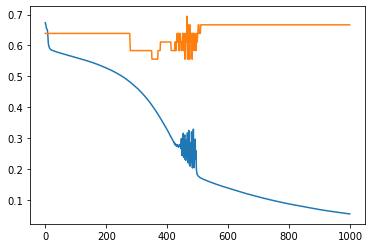

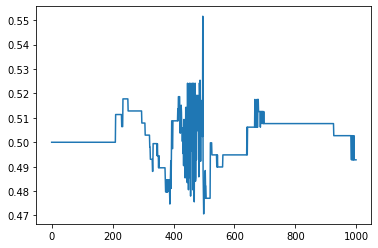

0.4927992799279928


In [5]:
# Separate training, validation, test sets?
x_train, x_vt, y_train, y_vt = train_test_split(km_normed_1, flt3_filtered, train_size=0.6, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_vt, y_vt, train_size=0.2, random_state=0)
classifier_vt = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0,
                           batch_size=100
                           )
                           #,early_stopping=True, n_iter_no_change=1000 
                           #,validation_fraction=0.1)
scores = []
training = []
validation = []
for i in range(1000):
    classifier_vt.partial_fit(x_train, y_train, classes=(0,1))
    t_loss = classifier_vt.loss_
    v_loss = classifier_vt.score(x_val, y_val)
    scores.append(roc_auc_score(y_test, classifier_vt.predict(x_test)))
    training.append(t_loss)
    validation.append(v_loss)
    if (i+1) % 100 == 0 or i == 0:
        print(f"\r{time.strftime('%H:%M:%S', time.localtime())}: {math.floor((i+1)/10)}% complete", end='')
plt.plot(training)
plt.plot(validation)
plt.show()
plt.plot(scores)
plt.show()
y_pred = classifier_vt.predict(x_test)
print(roc_auc_score(y_test, y_pred))

19:07:10: 100% complete

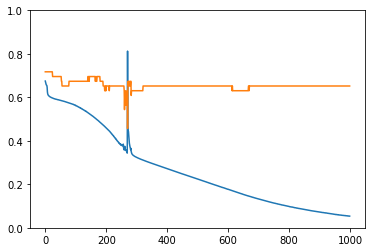

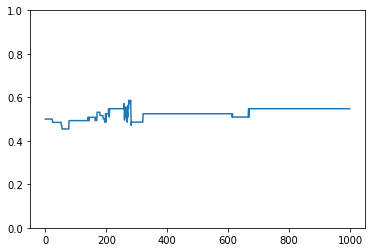

In [17]:
# Recreation of model with 0.73 AUC, but with partial_fit
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, test_size=0.1, random_state=3, stratify=flt3_filtered)
classifier_70s = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0,
                           batch_size=100
                           )
                           #,early_stopping=True, n_iter_no_change=1000, 
                           #validation_fraction=0.1)
scores = []
training = []
validation = []
for i in range(1000):
    classifier_70s.partial_fit(x_train, y_train, classes=(0,1))
    t_loss = classifier_70s.loss_
    v_loss = classifier_70s.score(x_test, y_test)
    scores.append(roc_auc_score(y_test, classifier_70s.predict(x_test)))
    training.append(t_loss)
    validation.append(v_loss)
    if (i+1) % 100 == 0 or i == 0:
        print(f"\r{time.strftime('%H:%M:%S', time.localtime())}: {math.floor((i+1)/10)}% complete", end='')
plt.plot(training)
plt.plot(validation)
plt.ylim(0, 1)
plt.show()
plt.plot(scores)
plt.ylim(0, 1)
plt.show()

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


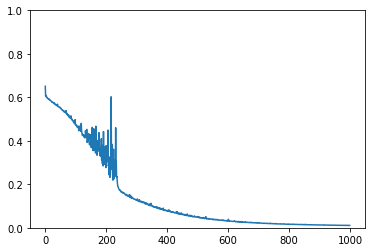

0.486013986013986


In [3]:
# Recreation of AUC=0.79 (64 batch size + low validation fraction + adaptive lr) 
# with random_state=0
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, 
                                                    test_size=0.1, random_state=0, 
                                                    stratify=flt3_filtered)
classifier_79 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=0, verbose=0,
                           batch_size=64
                           )
                           #,early_stopping=True, n_iter_no_change=1000, 
                           #validation_fraction=0.1)
classifier_79.fit(x_train, y_train)
plt.plot(classifier_79.loss_curve_)
#plt.plot(classifier_79.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_79.predict(x_test)
print(roc_auc_score(y_test, y_pred))

In [ ]:
# Trying to recreate AUC=0.79 with a proper training-validation-test split